In [1]:
import torch

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")

print("Path to dataset files:", path)

/Users/koala/Documents/deeplearning.info/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 367/367 [00:00<00:00, 420kB/s]

Extracting files...
Path to dataset files: /Users/koala/.cache/kagglehub/datasets/hussainnasirkhan/multiple-linear-regression-dataset/versions/1


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(f"{path}" + "/multiple_linear_regression_dataset.csv", sep=",")
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [5]:
import matplotlib.pyplot as plt

In [6]:
df["age"]

0     25
1     30
2     47
3     32
4     43
5     51
6     28
7     33
8     37
9     39
10    29
11    47
12    54
13    51
14    44
15    41
16    58
17    23
18    44
19    37
Name: age, dtype: int64

In [7]:
df.sort_values(by="experience")

,age,experience,income
0,25,1,30450
17,23,1,30870
10,29,1,27840
2,47,2,31580
1,30,3,35670
7,33,4,37650
13,51,4,34800
3,32,5,40130
6,28,5,41340
8,37,5,40250


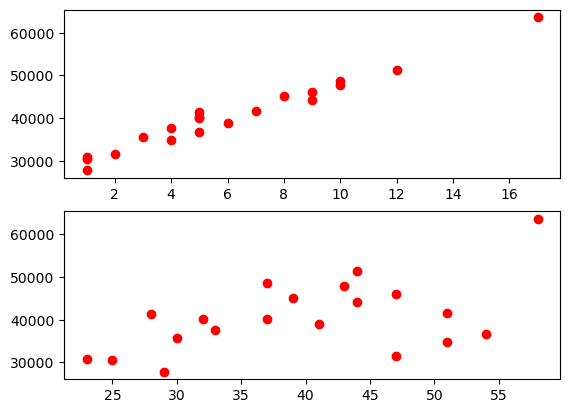

In [8]:
plt.subplot(2,1,1)
plt.plot(df["experience"], df["income"], 'ro')
plt.subplot(2,1,2)
plt.plot(df["age"], df["income"], 'ro')
plt.show()

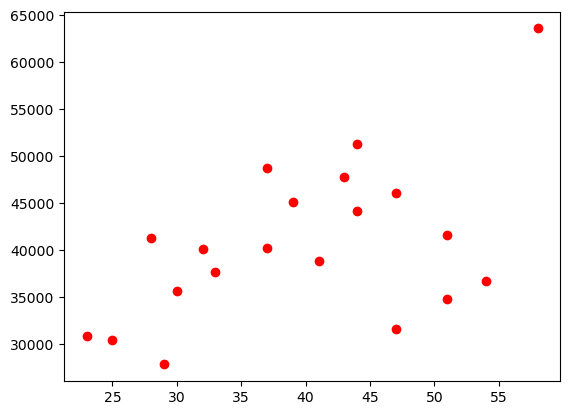

In [9]:
plt.plot(df["age"], df["income"], 'ro')
plt.show()

In [10]:
import numpy as np

In [30]:
class linearRegressor:
    def __init__(self):
        self.w = 0.3
        self.b = 0.4

    def forward(self, X):
        y_pred = np.dot(X, self.w) + self.b
        return y_pred

    def loss(self, y_pred, y_expected):
        y_pred = np.array(y_pred)
        y_expected = np.array(y_expected)
        return np.mean((y_expected-y_pred)**2)
    
    def backward(self, y, X, y_pred, lr = 0.01):
        f = y - (y_pred)
        N = len(X)
        self.w -= lr * (-2 * X.dot(f).sum() / N)
        self.b -= lr * (-2 * f.sum() / N)
        return self.w, self.b

In [31]:
lr = linearRegressor()
losses = []

In [34]:
y_train  = df["income"]
X_train  = np.array(df["experience"])
print(X_train.shape, y_train.shape)

(20,) (20,)


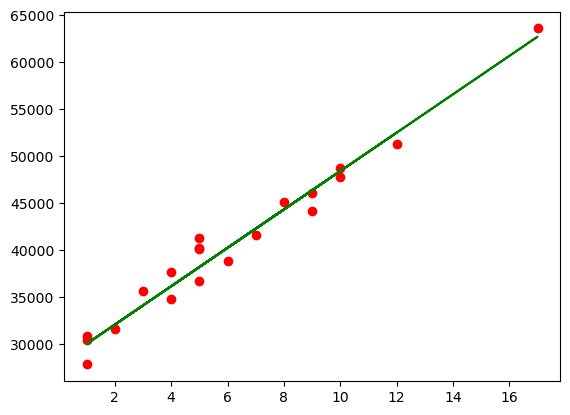

In [39]:
# Train the model for 200 iterations
y_pred = lr.forward(X_train)
y_train  = df["income"]
X_train  = np.array(df["experience"])
plt.plot(df["experience"], df["income"], 'ro')
plt.plot(X_train, y_pred, color = "g")
plt.show()

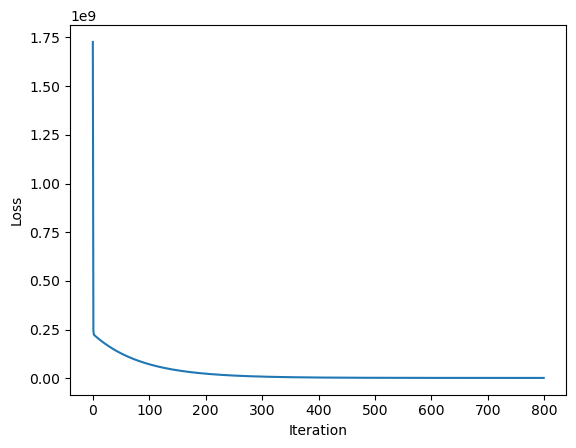

In [36]:
# Train the model
for i in range(800):
    y_pred = lr.forward(X_train)
    loss = lr.loss(y_pred, y_train)
    lr.backward(y_train, X_train, y_pred, lr=0.01)
    losses.append(loss)
# Plot the learning process
plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

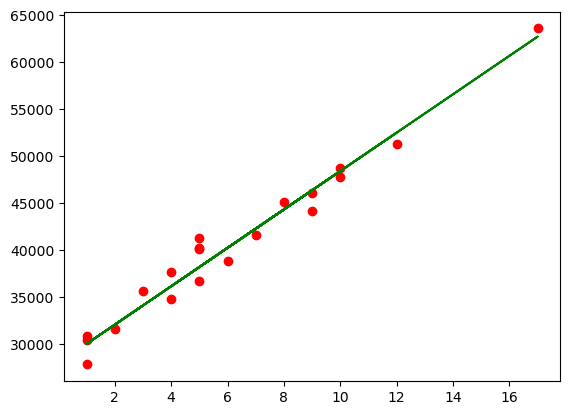

In [37]:
plt.plot(df["experience"], df["income"], 'ro')
plt.plot(X_train, y_pred, color = "g")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
model = LinearRegression()

In [22]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

In [23]:
model.fit(X_train, y_train)

LinearRegression()

Coefficients: 
 [[2014.04084158]] [28248.44678218]
Mean squared error: 2117888.88
Coefficient of determination: 0.97


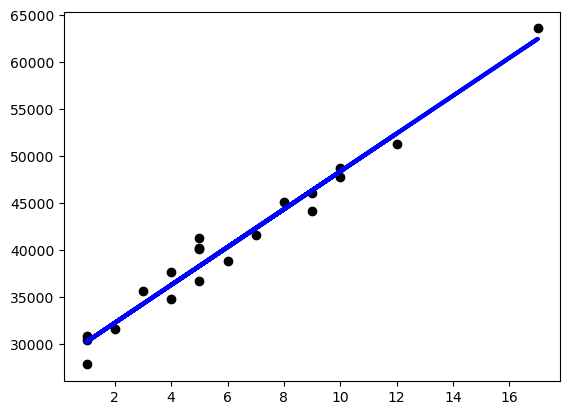

In [24]:
y_pred = model.predict(X_train)
print("Coefficients: \n", model.coef_, model.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))

# Plot outputs
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_pred, color="blue", linewidth=3)
plt.show()

In [25]:
import torch.nn as nn

In [26]:
class linearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [27]:
model = linearRegression(1, 1)

criterion = nn.MSELoss()
lr = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [28]:
for epoch in range(100):
    inputs = torch.Tensor(X_train).requires_grad_()
    labels = torch.Tensor(y_train)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1726752128.0
epoch 1, loss 526483104.0
epoch 2, loss 285692864.0
epoch 3, loss 236554064.0
epoch 4, loss 225701632.0
epoch 5, loss 222502576.0
epoch 6, loss 220838240.0
epoch 7, loss 219486416.0
epoch 8, loss 218202912.0
epoch 9, loss 216939008.0
epoch 10, loss 215684912.0
epoch 11, loss 214438576.0
epoch 12, loss 213199648.0
epoch 13, loss 211967968.0
epoch 14, loss 210743504.0
epoch 15, loss 209526096.0
epoch 16, loss 208315872.0
epoch 17, loss 207112672.0
epoch 18, loss 205916512.0
epoch 19, loss 204727328.0
epoch 20, loss 203545104.0
epoch 21, loss 202369696.0
epoch 22, loss 201201184.0
epoch 23, loss 200039536.0
epoch 24, loss 198884640.0
epoch 25, loss 197736496.0
epoch 26, loss 196595008.0
epoch 27, loss 195460256.0
epoch 28, loss 194332080.0
epoch 29, loss 193210464.0
epoch 30, loss 192095424.0
epoch 31, loss 190986880.0
epoch 32, loss 189884832.0
epoch 33, loss 188789168.0
epoch 34, loss 187699920.0
epoch 35, loss 186617040.0
epoch 36, loss 185540448.0
epoch 37, 

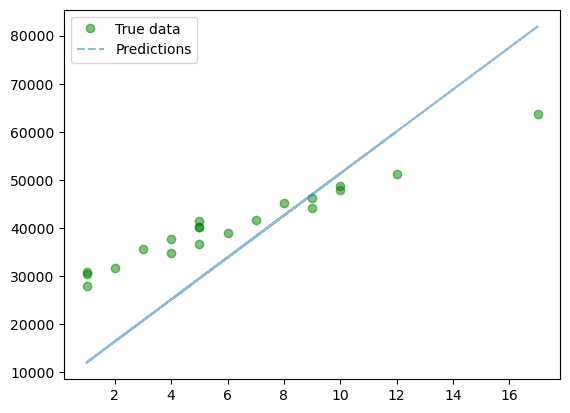

In [29]:
predicted = model(torch.Tensor(X_train).requires_grad_()).data.numpy()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()